*Creating a MOC from a set of coordinates*

In [1]:
%matplotlib inline

In [2]:
import warnings 
warnings.filterwarnings('ignore')
from mocpy import MOC

from astropy import units as u
from astropy.coordinates import SkyCoord, Angle

Let's load a VizieR catalog

In [3]:
from astroquery.vizier import Vizier

viz = Vizier(columns=['*', '_RAJ2000', '_DEJ2000'])
viz.ROW_LIMIT = -1
table = viz.get_catalogs('I/293/npm2cros')[0]

print(table)

_RAJ2000 _DEJ2000   NPM2   KLA  RAJ2000    DEJ2000   ID  IQ  IN r_Star  mag  tyc
  deg      deg                  "h:m:s"    "d:m:s"                      mag     
-------- -------- -------- --- ---------- --------- --- --- --- ------ ----- ---
339.6383  83.1667 +83.0016 HPM 22 38 33.2 +83 10 00   1   0   0    811 14.20    
339.6383  83.1667 +83.0016 HPM 22 38 33.2 +83 10 00   1   0   0    813 14.20    
349.5308  83.0106 +83.0022 VAR 23 18 07.4 +83 00 38   0   0   0    843    --   T
349.5308  83.0106 +83.0022 SRA 23 18 07.4 +83 00 38   0   0   0      1  9.60   T
323.8542  82.9972 +82.0030 UBV 21 35 25.0 +82 59 50   0   0   0      5 10.08   T
332.1079  82.7475 +82.0055  WD 22 08 25.9 +82 44 51   0   0   0   1012 16.00    
332.9337  82.6078 +82.0059 HPM 22 11 44.1 +82 36 28   1   0   0    811 16.70    
335.0887  82.9708 +82.0065 HPM 22 20 21.3 +82 58 15   1   0   0    811 11.00   T
337.1192  82.7639 +82.0074 UBV 22 28 28.6 +82 45 50   0   0   0      5 10.42   T
337.2746  82.6622 +82.0075 H

Let's create a MOC from the coordinates of this table

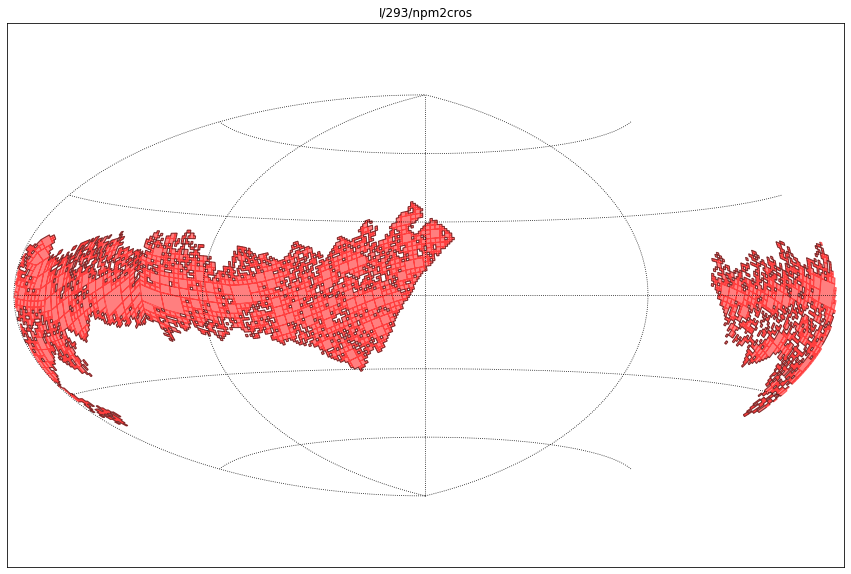

In [4]:

moc = MOC.from_lonlat(table['_RAJ2000'].T * u.deg, table['_DEJ2000'].T * u.deg, 6)

# A function creating all the matplotlib context for plotting a MOC with its perimeter
def plot(moc, title=''):
    from matplotlib import path, patches
    import matplotlib.pyplot as plt

    fig = plt.figure(figsize=(15, 10))
    from mocpy import WCS
    with WCS(fig, 
             fov=330 * u.deg,
             center=SkyCoord(0, 0, unit='deg', frame='galactic'),
             coordsys='galactic',
             rotation=Angle(0, u.degree),
             projection="AIT") as wcs:
        ax = fig.add_subplot(1, 1, 1, projection=wcs)

        moc.fill(ax=ax, wcs=wcs, edgecolor='r', facecolor='r', linewidth=1.0, fill=True, alpha=0.5)
        moc.border(ax=ax, wcs=wcs, color="black", alpha=0.5)
    
    plt.xlabel('ra')
    plt.ylabel('dec')
    if title:
        plt.title(title)
    plt.grid(color="black", linestyle="dotted")
    plt.show()
    plt.close()

plot(moc=moc, title='I/293/npm2cros')